Artificial neural network

In [2]:
# Step 1 Data pre processing
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Importing the data
df = pd.read_csv('Churn_Modelling.csv')
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [9]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,6647,15662021,Lucciano,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
6588,6589,15693817,Ferrari,539,Spain,Male,28,5,0.00,2,1,0,48382.40,0
3178,3179,15609669,Chuang,542,France,Female,39,4,109949.39,2,1,1,41268.65,0
836,837,15585036,Okoli,694,Spain,Female,37,3,0.00,2,1,1,147012.22,0
6654,6655,15799998,Cunningham,608,France,Female,30,8,85859.76,1,0,0,142730.27,0


In [11]:
# Create dummy variables
geography = pd.get_dummies(x["Geography"],drop_first=True)
gender = pd.get_dummies(x["Gender"],drop_first=True)

#Concatenate the dataframes
x = pd.concat([x,geography,gender],axis=1)

In [12]:
#Dropping unnecessary columns
x= x.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Importing the ANN

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [18]:
# Initializing the ANN
ann= Sequential()
# Adding the input layer and the first hidden layer
ann.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#units define no. of outputs
# Adding the second hidden layer
ann.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
ann.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [21]:
# Fitting the ANN to the Training set
model_history=ann.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.7289 - accuracy: 0.5494 - val_loss: 0.5971 - val_accuracy: 0.7357
Epoch 2/100
536/536 [==============================] - 1s 994us/step - loss: 0.5436 - accuracy: 0.7843 - val_loss: 0.5160 - val_accuracy: 0.7952
Epoch 3/100
536/536 [==============================] - 1s 992us/step - loss: 0.4988 - accuracy: 0.7970 - val_loss: 0.4959 - val_accuracy: 0.7952
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4843 - accuracy: 0.7968 - val_loss: 0.4859 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4747 - accuracy: 0.7968 - val_loss: 0.4775 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4663 - accuracy: 0.7968 - val_loss: 0.4708 - val_accuracy: 0.7952
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4591 - accuracy: 0.7970 - val_loss: 0.4648 - val_accuracy: 0.

Epoch 58/100
536/536 [==============================] - 1s 991us/step - loss: 0.3401 - accuracy: 0.8610 - val_loss: 0.3706 - val_accuracy: 0.8448
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3399 - accuracy: 0.8621 - val_loss: 0.3708 - val_accuracy: 0.8440
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3397 - accuracy: 0.8621 - val_loss: 0.3707 - val_accuracy: 0.8440
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3394 - accuracy: 0.8612 - val_loss: 0.3705 - val_accuracy: 0.8444
Epoch 62/100
536/536 [==============================] - 1s 994us/step - loss: 0.3393 - accuracy: 0.8615 - val_loss: 0.3702 - val_accuracy: 0.8448
Epoch 63/100
536/536 [==============================] - 1s 993us/step - loss: 0.3391 - accuracy: 0.8614 - val_loss: 0.3702 - val_accuracy: 0.8440
Epoch 64/100
536/536 [==============================] - 1s 993us/step - loss: 0.3389 - accuracy: 0.8619 - val_loss: 0.3700 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


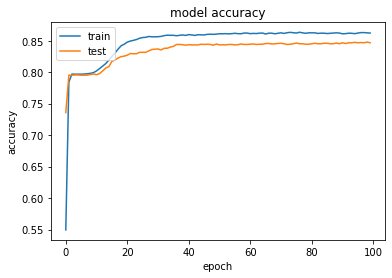

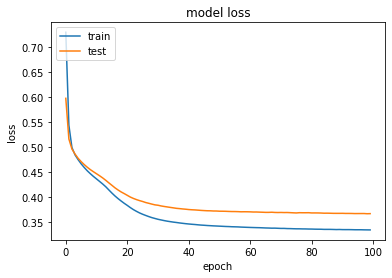

In [23]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [25]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 535us/step


In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)